break


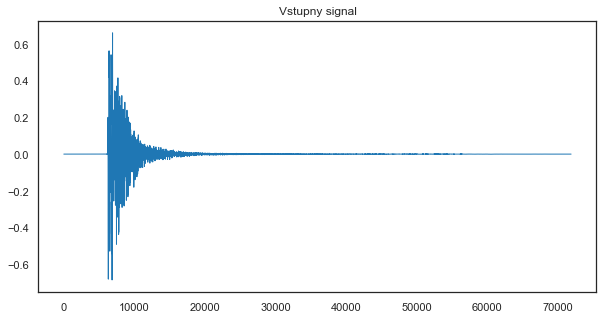

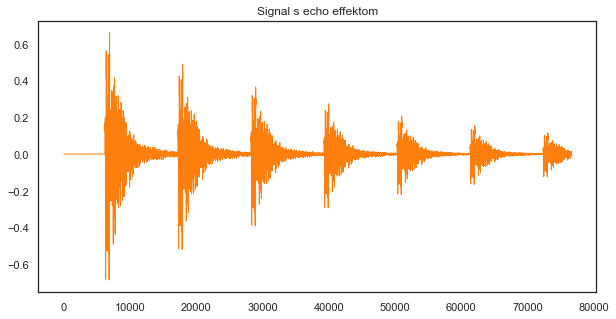

In [3]:
import os
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sounddevice as sd
from pydub import AudioSegment
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

def echoFB (x,Fs,delayTime,a,prah):
    Nx = len(x)
    Ny = 100 * Nx
    v = np.zeros((Ny,1))
    y = v.flatten()
    dSamples =  math.ceil(delayTime * Fs)
    for n in range(Ny):
        if n <= dSamples:
            # prvych dSamples vzoriek vystupu kopiruje vstup
            y[n] = x[n]
        elif n <= Nx-1:
            # kym nepride posledna vzorka vstupneho signalu na vystupe je vstupny signal a oneskoreny vystupny signal
            y[n] = x[n] + a * y[n - dSamples];
        else:
            # Po skonceni vstupneho signalu je na vystupe uz len oneskoreny vystupny signal 
            y[n] = a * y[n - dSamples];
            # Sledovanie intenzity signalu
            En = abs(y[n - dSamples]);
            En = En + abs(y[n - dSamples + 1]);
            for i in range(dSamples):
                En = En + abs(y[n - dSamples + i]);
            En = En / dSamples;
            Ny = n;
            if En < prah:
                print("break")
                break
    arr=y[1:Ny]            
    return arr 

fn_wav = os.path.join('..', 'git', 'sounds', 'hit.wav')
x, Fs = librosa.load(fn_wav, sr=None)
# Oneskorenie signalu v spatnej vazbe
dSec = 0.25; 
a = 0.75; 
Prah = 0.01;
y  = echoFB(x,Fs,dSec,a,Prah)

pd.Series(x).plot(figsize=(10,5),
                  lw=1,
                  title='Vstupny signal',
                  color=color_pal[0])

plt.show()
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title='Signal s echo effektom',
                  color=color_pal[1])

plt.show()

In [4]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/hit.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(y, Fs)